In [ ]:
import numpy as np
import cv2 as cv
import os
import pandas as pd
import matplotlib.pyplot as plt

ia=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/good' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ia.append(img_array)
print(ia)  
    #img_array=(img_array.flatten())
    #img_array=img_array.reshape(-1,1).T/255 # Each pixel value ranges from 0-255 
    #imv=cv.imshow('img',img_array)
   #plt.imshow(img_array, cmap='gray') 
   #plt.show
   #print(img_array)
  # with open('imgshoulder.csv','ab' ) as f:
        #np.savetxt(f, img_array, delimiter=',')

[array([[[200, 208, 207],
        [214, 222, 221],
        [132, 140, 139],
        ...,
        [236, 239, 244],
        [232, 236, 237],
        [164, 168, 169]],

       [[206, 215, 212],
        [186, 194, 193],
        [126, 134, 133],
        ...,
        [238, 238, 244],
        [232, 234, 235],
        [ 78,  80,  81]],

       [[203, 210, 207],
        [178, 185, 182],
        [141, 148, 145],
        ...,
        [240, 238, 244],
        [228, 229, 233],
        [ 79,  80,  84]],

       ...,

       [[190, 183, 190],
        [114, 110, 115],
        [196, 192, 197],
        ...,
        [147, 160, 158],
        [220, 231, 229],
        [222, 228, 227]],

       [[105,  91,  97],
        [102,  93,  96],
        [164, 157, 160],
        ...,
        [242, 238, 244],
        [244, 241, 243],
        [157, 154, 156]],

       [[108,  89,  92],
        [103,  84,  87],
        [113,  94,  97],
        ...,
        [171, 155, 162],
        [134, 119, 123],
        [113,  98, 102]

In [ ]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

In [ ]:
grey=[]
for i in range(len(ia)):
  esp=cv.cvtColor(ia[i], cv.COLOR_BGR2GRAY)
  grey.append(esp)


In [ ]:
(grey[0]).shape
#plt.imshow(grey[0])

(173, 25)

In [ ]:
grey[0]

array([[207, 221, 139, ..., 240, 236, 168],
       [213, 193, 133, ..., 240, 234,  80],
       [208, 183, 146, ..., 240, 230,  81],
       ...,
       [186, 112, 194, ..., 158, 229, 227],
       [ 94,  95, 159, ..., 240, 242, 155],
       [ 92,  87,  97, ..., 159, 122, 101]], dtype=uint8)

In [ ]:
len(grey)

52

In [ ]:
#from skimage import io
#image=io.imread('/content/drive/MyDrive/Tabulators-dataset/Dataset/bad/IMG_bad13.jpg')
#print(type(image))
#print(image.dtype)
#print(image.shape)
#plt.imshow(image)
sh=[]
siz=[]
for j in range(len(ia)):
  sh.append((grey[j]).shape)
  siz.append((grey[j]).size) 
print(sh) 
print(siz) 

[(173, 25), (183, 26), (185, 26), (184, 26), (184, 26), (186, 26), (179, 26), (174, 26), (160, 26), (198, 26), (198, 26), (179, 26), (156, 20), (156, 21), (158, 22), (154, 21), (156, 21), (184, 22), (185, 22), (185, 25), (186, 25), (184, 25), (193, 25), (193, 25), (191, 24), (193, 24), (193, 24), (188, 24), (189, 25), (166, 21), (199, 19), (197, 17), (177, 20), (174, 18), (175, 21), (177, 23), (177, 21), (176, 20), (178, 20), (191, 23), (166, 15), (161, 19), (174, 21), (177, 22), (168, 22), (164, 20), (173, 22), (166, 25), (165, 17), (175, 23), (174, 22), (177, 22)]
[4325, 4758, 4810, 4784, 4784, 4836, 4654, 4524, 4160, 5148, 5148, 4654, 3120, 3276, 3476, 3234, 3276, 4048, 4070, 4625, 4650, 4600, 4825, 4825, 4584, 4632, 4632, 4512, 4725, 3486, 3781, 3349, 3540, 3132, 3675, 4071, 3717, 3520, 3560, 4393, 2490, 3059, 3654, 3894, 3696, 3280, 3806, 4150, 2805, 4025, 3828, 3894]


52

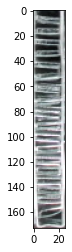

In [ ]:
 plt.imshow(ia[0])
(ia[0]).shape
len(ia)

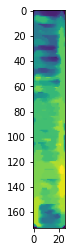

In [ ]:
# Median Filter : remove the speckle noise of the image 
no_Lnoise=[]
for i in range(len(grey)):
  blur=median_filter(grey[i], 5)
  no_Lnoise.append(blur)
no_Lnoise
plt.imshow(no_Lnoise[0])

In [ ]:
# Gaussian Filter: To highlight the edge of an image 
# Gaussian
#no_noise=[]
#for i in range(len(no_Lnoise)):
 # blar=cv.GaussianBlur(no_Lnoise[i], (5,5), 0)
 # no_noise.append(blar)
#plt.imshow(no_noise[0])

In [ ]:
#print(ia[0])
#print(no_Lnoise[0])

In [ ]:
#cv.imread(ia[0])
#plt.imshow(ia[0])

In [ ]:
#(ia[0]).shape

In [ ]:
#plt.imshow(no_Lnoise[0])

In [ ]:
"""
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(ia[115])
plt.title('Original')

#plt.xticks([]), plt.yticks([])
#plt.subplot(132)
#plt.imshow(no_Lnoise[115])
#plt.title('no_Laplacian')
#plt.xticks([]), plt.yticks([])
#plt.subplot(122), plt.imshow(ia[0]+  no_noise[0], cmap='gray')

plt.xticks([]), plt.yticks([])
plt.subplot(122), 
plt.title('no_noise')
plt.imshow(ia[115]+ no_Lnoise[115] )
plt.show()
"""

"\nplt.figure(figsize=(10,7))\nplt.subplot(121)\nplt.imshow(ia[115])\nplt.title('Original')\n\n#plt.xticks([]), plt.yticks([])\n#plt.subplot(132)\n#plt.imshow(no_Lnoise[115])\n#plt.title('no_Laplacian')\n#plt.xticks([]), plt.yticks([])\n#plt.subplot(122), plt.imshow(ia[0]+  no_noise[0], cmap='gray')\n\nplt.xticks([]), plt.yticks([])\nplt.subplot(122), \nplt.title('no_noise')\nplt.imshow(ia[115]+ no_Lnoise[115] )\nplt.show()\n"

In [ ]:
#Local Binary Pattern Features Extractors

from skimage import feature

def lbp_features(ima, radius=2, sampling_pixels=8):
  if (len(ima.shape) > 2):
    ima=ima.astype(float)
  ima=ima.astype(np.uint8)
  i_min=np.min(ima)
  i_max=np.max(ima)
  if (i_max-i_min !=0):
    ima=(ima-i_min)/(i_max-i_min)
  lbp= feature.local_binary_pattern(ima, sampling_pixels, radius, method='uniform')
  (hist, _)=np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels+3), range=(0, sampling_pixels+2))
  hist=hist.astype('float')
  hist /= (hist.sum() + 1e-6)
  return hist


In [ ]:
#from skimage.transform import rotate
#from skimage.feature import local_binary_pattern
#from skimage.color import label2rgb

In [ ]:
"""
lbp_histo=[]
for i in range(len(grey)):
  lbp=local_binary_pattern(grey[i], 8, 1, 'uniform')
  n_bins=int(lbp.max()+1)
  hist, _=np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
  hist=hist.astype('float')
  hist /= (hist.sum() + 1e-6)
  lbp_histo.append(hist) 
  """

"\nlbp_histo=[]\nfor i in range(len(grey)):\n  lbp=local_binary_pattern(grey[i], 8, 1, 'uniform')\n  n_bins=int(lbp.max()+1)\n  hist, _=np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))\n  hist=hist.astype('float')\n  hist /= (hist.sum() + 1e-6)\n  lbp_histo.append(hist) \n  "

In [ ]:
lbp_hist=[]
for i in range(len(no_Lnoise)):
  lbp_hist.append(lbp_features(no_Lnoise[i], 2, 8))
lbp_hist

[array([0.00508671, 0.03028902, 0.04439306, 0.10473988, 0.1532948 ,
        0.26219653, 0.08786127, 0.07236994, 0.15075145, 0.08901734]),
 array([0.00588483, 0.02374947, 0.03299706, 0.08764187, 0.1557377 ,
        0.27553594, 0.10235393, 0.0714586 , 0.10067255, 0.14396805]),
 array([0.00810811, 0.04303534, 0.04760915, 0.13264033, 0.21122661,
        0.23139293, 0.08711019, 0.06507277, 0.09355509, 0.08024948]),
 array([0.00397157, 0.03051839, 0.03219064, 0.09908027, 0.17474916,
        0.29243311, 0.07650502, 0.06291806, 0.14966555, 0.07796823]),
 array([0.00397157, 0.03051839, 0.03219064, 0.09908027, 0.17474916,
        0.29243311, 0.07650502, 0.06291806, 0.14966555, 0.07796823]),
 array([0.0035153 , 0.0248139 , 0.03081059, 0.09615385, 0.17700579,
        0.29425145, 0.08043838, 0.07299421, 0.12758478, 0.09243176]),
 array([0.00601633, 0.02771809, 0.04297379, 0.11366566, 0.17984529,
        0.28599055, 0.08938547, 0.07348517, 0.07090675, 0.11001289]),
 array([0.00221043, 0.01392573, 0.

52


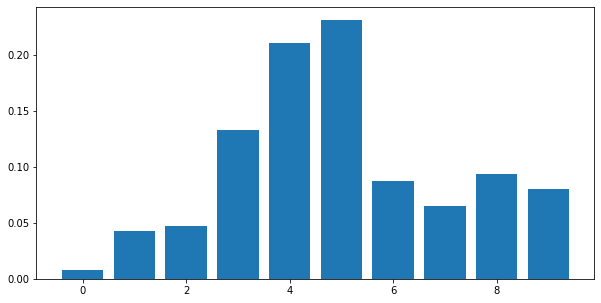

In [ ]:
vals=range(len(lbp_hist[2]))
plt.figure(figsize=(10,5))
plt.bar(vals, lbp_hist[2])
print(len(lbp_hist))

In [ ]:
len(lbp_hist)

52

In [ ]:
data_good=pd.DataFrame(lbp_hist)

In [ ]:
data_good

,0,1,2,3,4,5,6,7,8,9
0,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
1,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
2,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249
3,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
4,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
5,0.003515,0.024814,0.030811,0.096154,0.177006,0.294251,0.080438,0.072994,0.127585,0.092432
6,0.006016,0.027718,0.042974,0.113666,0.179845,0.285991,0.089385,0.073485,0.070907,0.110013
7,0.002210,0.013926,0.043767,0.095712,0.158267,0.337975,0.097701,0.073828,0.083775,0.092838
8,0.007692,0.037500,0.036779,0.090144,0.160337,0.286298,0.089183,0.087981,0.115385,0.088702
9,0.005051,0.023699,0.041570,0.094211,0.184926,0.290016,0.090909,0.070707,0.107615,0.091298


In [ ]:
dat=(data_good).T

In [ ]:
dat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.005087,0.005885,0.008108,0.003972,0.003972,0.003515,0.006016,0.002210,0.007692,0.005051,0.005051,0.003868,0.004808,0.007021,0.006617,0.005257,0.008547,0.008893,0.007617,0.004108,0.006022,0.004130,0.005181,0.008497,0.006763,0.006261,0.007556,0.007092,0.007196,0.008606,0.006876,0.008958,0.005932,0.007982,0.005714,0.005158,0.005112,0.008523,0.006461,0.005691,0.005622,0.007192,0.008210,0.008731,0.010281,0.007927,0.004992,0.003133,0.008556,0.007702,0.008359,0.007704
1,0.030289,0.023749,0.043035,0.030518,0.030518,0.024814,0.027718,0.013926,0.037500,0.023699,0.023699,0.018694,0.035256,0.023199,0.017261,0.033704,0.024115,0.033350,0.032187,0.019676,0.026667,0.036522,0.032746,0.033782,0.032068,0.038860,0.036054,0.027704,0.030265,0.047619,0.043110,0.046282,0.033616,0.049170,0.034286,0.029968,0.031208,0.042614,0.055056,0.033690,0.050201,0.058189,0.037767,0.027735,0.040584,0.032927,0.024961,0.027470,0.047415,0.035031,0.037356,0.033128
2,0.044393,0.032997,0.047609,0.032191,0.032191,0.030811,0.042974,0.043767,0.036779,0.041570,0.041570,0.031801,0.042308,0.036935,0.035098,0.045455,0.036935,0.042490,0.042260,0.041081,0.045161,0.033261,0.036891,0.042487,0.046684,0.039292,0.033463,0.035018,0.045503,0.036718,0.052632,0.042699,0.042373,0.046935,0.040816,0.033653,0.051386,0.038636,0.023596,0.035511,0.044578,0.046747,0.039409,0.036210,0.034361,0.049390,0.045455,0.041446,0.052406,0.042981,0.042059,0.034155
3,0.104740,0.087642,0.132640,0.099080,0.099080,0.096154,0.113666,0.095712,0.090144,0.094211,0.094211,0.107864,0.092628,0.103175,0.101266,0.110080,0.112637,0.115860,0.133661,0.103784,0.105591,0.109130,0.133886,0.110881,0.115620,0.082686,0.093480,0.102615,0.107302,0.096672,0.145729,0.138847,0.107910,0.140805,0.105306,0.119135,0.139091,0.102557,0.128933,0.135215,0.152209,0.125858,0.123974,0.111967,0.089556,0.106707,0.111929,0.102892,0.117647,0.077019,0.096917,0.109913
4,0.153295,0.155738,0.211227,0.174749,0.174749,0.177006,0.179845,0.158267,0.160337,0.184926,0.184926,0.157499,0.145192,0.142552,0.145282,0.177180,0.137973,0.176136,0.174201,0.160865,0.152258,0.189130,0.194404,0.163109,0.171684,0.144430,0.185449,0.148271,0.144550,0.169822,0.234065,0.201254,0.184463,0.229246,0.154558,0.183739,0.153080,0.144886,0.201404,0.194628,0.249799,0.216737,0.205528,0.145095,0.167208,0.128354,0.145822,0.180723,0.160071,0.136149,0.177116,0.172573
5,0.262197,0.275536,0.231393,0.292433,0.292433,0.294251,0.285991,0.337975,0.286298,0.290016,0.290016,0.306403,0.265064,0.254579,0.275604,0.272109,0.236569,0.253953,0.217445,0.292973,0.302796,0.259565,0.239171,0.260518,0.265925,0.235320,0.275043,0.253103,0.273651,0.253012,0.227189,0.259779,0.250847,0.228927,0.266122,0.259641,0.246435,0.229830,0.238483,0.225586,0.236145,0.209873,0.241106,0.272984,0.274080,0.266159,0.260378,0.335181,0.247059,0.296894,0.274033,0.265794
6,0.087861,0.102354,0.087110,0.076505,0.076505,0.080438,0.089385,0.097701,0.089183,0.090909,0.090909,0.082939,0.081731,0.100122,0.088320,0.094001,0.072955,0.090168,0.071007,0.101189,0.096774,0.087609,0.084145,0.083316,0.078970,0.084197,0.085708,0.084220,0.094815,0.093804,0.082782,0.083906,0.102542,0.085249,0.075374,0.092361,0.090126,0.088636,0.088483,0.081038,0.103614,0.083687,0.079912,0.091936,0.092262,0.101829,0.088544,0.095181,0.105882,0.091925,0.093260,0.083462
7,0.072370,0.071459,0.065073,0.062918,0.062918,0.072994,0.073485,0.073828,0.087981,0.070707,0.070707,0.068973,0.075962,0.094322,0.091772,0.080396,0.099206,0.072134,0.082555,0.071568,0.064086,0.071957,0.080000,0.088290,0.073735,0.078584,0.082038,0.080452,0.088042,0.068847,0.061359,0.058824,0.077401,0.066092,0.054422,0.079833,0.080172,0.101136,0.094944,0.081493,0.060643,0.072246,0.086754,0.082691,0.084145,0.067378,0.088807,0.057590,0.070945,0.088944,0.079415,0.088341
8,0.150751,0.100673,0.093555,0.149666,0.149666,0.127585,0.070907,0.083775,0.115385,0.107615,0

In [ ]:
dat.rename(columns={0:'g', 1:'g', 2:'g', 3:'g', 4:'g', 5:'g', 6:'g', 7:'g', 8:'g', 9:'g', 10:'g', 11:'g', 12:'g', 13:'g', 14:'g', 15:'g',16:'g', 17:'g', 18:'g', 19:'g', 20:'g', 21:'g', 22:'g', 23:'g', 24:'g', 25:'g', 26:'g', 27:'g', 28:'g', 29:'g', 30:'g', 31:'g', 32:'g', 33:'g', 34:'g', 35:'g', 36:'g', 37:'g', 38:'g', 39:'g', 40:'g', 41:'g', 42:'g', 43:'g', 44:'g', 45:'g', 46:'g', 47:'g', 48:'g', 49:'g', 50:'g', 51:'g', 52:'b53', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
dat

,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g,g
0,0.005087,0.005885,0.008108,0.003972,0.003972,0.003515,0.006016,0.002210,0.007692,0.005051,0.005051,0.003868,0.004808,0.007021,0.006617,0.005257,0.008547,0.008893,0.007617,0.004108,0.006022,0.004130,0.005181,0.008497,0.006763,0.006261,0.007556,0.007092,0.007196,0.008606,0.006876,0.008958,0.005932,0.007982,0.005714,0.005158,0.005112,0.008523,0.006461,0.005691,0.005622,0.007192,0.008210,0.008731,0.010281,0.007927,0.004992,0.003133,0.008556,0.007702,0.008359,0.007704
1,0.030289,0.023749,0.043035,0.030518,0.030518,0.024814,0.027718,0.013926,0.037500,0.023699,0.023699,0.018694,0.035256,0.023199,0.017261,0.033704,0.024115,0.033350,0.032187,0.019676,0.026667,0.036522,0.032746,0.033782,0.032068,0.038860,0.036054,0.027704,0.030265,0.047619,0.043110,0.046282,0.033616,0.049170,0.034286,0.029968,0.031208,0.042614,0.055056,0.033690,0.050201,0.058189,0.037767,0.027735,0.040584,0.032927,0.024961,0.027470,0.047415,0.035031,0.037356,0.033128
2,0.044393,0.032997,0.047609,0.032191,0.032191,0.030811,0.042974,0.043767,0.036779,0.041570,0.041570,0.031801,0.042308,0.036935,0.035098,0.045455,0.036935,0.042490,0.042260,0.041081,0.045161,0.033261,0.036891,0.042487,0.046684,0.039292,0.033463,0.035018,0.045503,0.036718,0.052632,0.042699,0.042373,0.046935,0.040816,0.033653,0.051386,0.038636,0.023596,0.035511,0.044578,0.046747,0.039409,0.036210,0.034361,0.049390,0.045455,0.041446,0.052406,0.042981,0.042059,0.034155
3,0.104740,0.087642,0.132640,0.099080,0.099080,0.096154,0.113666,0.095712,0.090144,0.094211,0.094211,0.107864,0.092628,0.103175,0.101266,0.110080,0.112637,0.115860,0.133661,0.103784,0.105591,0.109130,0.133886,0.110881,0.115620,0.082686,0.093480,0.102615,0.107302,0.096672,0.145729,0.138847,0.107910,0.140805,0.105306,0.119135,0.139091,0.102557,0.128933,0.135215,0.152209,0.125858,0.123974,0.111967,0.089556,0.106707,0.111929,0.102892,0.117647,0.077019,0.096917,0.109913
4,0.153295,0.155738,0.211227,0.174749,0.174749,0.177006,0.179845,0.158267,0.160337,0.184926,0.184926,0.157499,0.145192,0.142552,0.145282,0.177180,0.137973,0.176136,0.174201,0.160865,0.152258,0.189130,0.194404,0.163109,0.171684,0.144430,0.185449,0.148271,0.144550,0.169822,0.234065,0.201254,0.184463,0.229246,0.154558,0.183739,0.153080,0.144886,0.201404,0.194628,0.249799,0.216737,0.205528,0.145095,0.167208,0.128354,0.145822,0.180723,0.160071,0.136149,0.177116,0.172573
5,0.262197,0.275536,0.231393,0.292433,0.292433,0.294251,0.285991,0.337975,0.286298,0.290016,0.290016,0.306403,0.265064,0.254579,0.275604,0.272109,0.236569,0.253953,0.217445,0.292973,0.302796,0.259565,0.239171,0.260518,0.265925,0.235320,0.275043,0.253103,0.273651,0.253012,0.227189,0.259779,0.250847,0.228927,0.266122,0.259641,0.246435,0.229830,0.238483,0.225586,0.236145,0.209873,0.241106,0.272984,0.274080,0.266159,0.260378,0.335181,0.247059,0.296894,0.274033,0.265794
6,0.087861,0.102354,0.087110,0.076505,0.076505,0.080438,0.089385,0.097701,0.089183,0.090909,0.090909,0.082939,0.081731,0.100122,0.088320,0.094001,0.072955,0.090168,0.071007,0.101189,0.096774,0.087609,0.084145,0.083316,0.078970,0.084197,0.085708,0.084220,0.094815,0.093804,0.082782,0.083906,0.102542,0.085249,0.075374,0.092361,0.090126,0.088636,0.088483,0.081038,0.103614,0.083687,0.079912,0.091936,0.092262,0.101829,0.088544,0.095181,0.105882,0.091925,0.093260,0.083462
7,0.072370,0.071459,0.065073,0.062918,0.062918,0.072994,0.073485,0.073828,0.087981,0.070707,0.070707,0.068973,0.075962,0.094322,0.091772,0.080396,0.099206,0.072134,0.082555,0.071568,0.064086,0.071957,0.080000,0.088290,0.073735,0.078584,0.082038,0.080452,0.088042,0.068847,0.061359,0.058824,0.077401,0.066092,0.054422,0.079833,0.080172,0.101136,0.094944,0.081493,0.060643,0.072246,0.086754,0.082691,0.084145,0.067378,0.088807,0.057590,0.070945,0.088944,0.079415,0.088341
8,0.150751,0.100673,0.093555,0.149666,0.149666,0.127585,0.070907,0.083775,0.115385,0.107615,0.107615,0.128706,0.138462,0.140110,0.11334

In [ ]:
#from sklearn.neighbors import kneighbors_graph
#Graph=kneighbors_graph(dat,5, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False, n_jobs=None)

In [ ]:
#Graph.toarray()

In [ ]:
gd=dat.T
gd

,0,1,2,3,4,5,6,7,8,9
g,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
g,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
g,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003515,0.024814,0.030811,0.096154,0.177006,0.294251,0.080438,0.072994,0.127585,0.092432
g,0.006016,0.027718,0.042974,0.113666,0.179845,0.285991,0.089385,0.073485,0.070907,0.110013
g,0.002210,0.013926,0.043767,0.095712,0.158267,0.337975,0.097701,0.073828,0.083775,0.092838
g,0.007692,0.037500,0.036779,0.090144,0.160337,0.286298,0.089183,0.087981,0.115385,0.088702
g,0.005051,0.023699,0.041570,0.094211,0.184926,0.290016,0.090909,0.070707,0.107615,0.091298


In [ ]:
gd.rename(columns={0:'f1', 1:'f2', 2:'f3', 3:'f4', 4:'f5', 5:'f6', 6:'f7', 7:'f8', 8:'f9', 9:'f10'}, inplace=True)

In [ ]:
gd
good=gd
good

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
g,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
g,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
g,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003515,0.024814,0.030811,0.096154,0.177006,0.294251,0.080438,0.072994,0.127585,0.092432
g,0.006016,0.027718,0.042974,0.113666,0.179845,0.285991,0.089385,0.073485,0.070907,0.110013
g,0.002210,0.013926,0.043767,0.095712,0.158267,0.337975,0.097701,0.073828,0.083775,0.092838
g,0.007692,0.037500,0.036779,0.090144,0.160337,0.286298,0.089183,0.087981,0.115385,0.088702
g,0.005051,0.023699,0.041570,0.094211,0.184926,0.290016,0.090909,0.070707,0.107615,0.091298


In [ ]:
"""
ib=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/bad' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ib.append(img_array)
print(ib)  
"""

"\nib=[]\nIMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/bad' # path to the data set\nfor img in os.listdir(IMG_DIR):\n  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale\n  ib.append(img_array)\nprint(ib)  \n"

In [ ]:
"""
brey=[]
for i in range(len(ib)):
  espo=cv.cvtColor(ib[i], cv.COLOR_BGR2GRAY)
  brey.append(espo)
"""

'\nbrey=[]\nfor i in range(len(ib)):\n  espo=cv.cvtColor(ib[i], cv.COLOR_BGR2GRAY)\n  brey.append(espo)\n'

In [ ]:
"""
print(len(brey))
print(len(brey[0]))
"""

'\nprint(len(brey))\nprint(len(brey[0]))\n'

In [ ]:
"""
# Median Filter  : remove the speckle noise of the image 
no_Lbnoise=[]
for i in range(len(brey)):
  blurb=median_filter(brey[i], 5)
  no_Lbnoise.append(blurb)
no_Lbnoise
plt.imshow(no_Lbnoise[0])
print(len(no_Lbnoise))
"""

'\n# Median Filter  : remove the speckle noise of the image \nno_Lbnoise=[]\nfor i in range(len(brey)):\n  blurb=median_filter(brey[i], 5)\n  no_Lbnoise.append(blurb)\nno_Lbnoise\nplt.imshow(no_Lbnoise[0])\nprint(len(no_Lbnoise))\n'

In [ ]:
"""
lbpb_hist=[]
for i in range(len(no_Lbnoise)):
  lbpb_hist.append(lbp_features(no_Lbnoise[i], 2, 8))
lbpb_hist
"""

'\nlbpb_hist=[]\nfor i in range(len(no_Lbnoise)):\n  lbpb_hist.append(lbp_features(no_Lbnoise[i], 2, 8))\nlbpb_hist\n'

In [ ]:
"""vals=range(len(lbpb_hist[2]))
plt.figure(figsize=(10,5))
plt.bar(vals, lbpb_hist[2])
print(len(lbpb_hist[2]))
"""

'vals=range(len(lbpb_hist[2]))\nplt.figure(figsize=(10,5))\nplt.bar(vals, lbpb_hist[2])\nprint(len(lbpb_hist[2]))\n'

In [ ]:
"""
data_bad=pd.DataFrame(lbpb_hist)
data_bad
"""

'\ndata_bad=pd.DataFrame(lbpb_hist)\ndata_bad\n'

In [ ]:
"""
dat1=(data_bad).T
dat1
"""

'\ndat1=(data_bad).T\ndat1\n'

In [ ]:
#dat1.rename(columns={0:'b', 1:'b', 2:'b', 3:'b', 4:'b', 5:'b', 6:'b', 7:'b', 8:'b', 9:'b', 10:'b', 11:'b', 12:'b', 13:'b', 14:'b', 15:'b',16:'b', 17:'b', 18:'b', 19:'b', 20:'b', 21:'b', 22:'b', 23:'b', 24:'b', 25:'b', 26:'b', 27:'b', 28:'b', 29:'b', 30:'b', 31:'b', 32:'b', 33:'b', 34:'b', 35:'b', 36:'b', 37:'b', 38:'b', 39:'b', 40:'b', 41:'b', 42:'b', 43:'b', 44:'b', 45:'b', 46:'b', 47:'b', 48:'b', 49:'b', 50:'b', 51:'b', 52:'b', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
#dat1

In [ ]:
#db=dat1.T
#db
#db.rename(columns={0:'f1', 1:'f2', 2:'f3', 3:'f4', 4:'f5', 5:'f6', 6:'f7', 7:'f8', 8:'f9', 9:'f10'}, inplace=True)

In [ ]:
#db

In [ ]:
#bad=db
#bad

In [ ]:
ie=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/empty' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ie.append(img_array)
print(ie) 

[array([[[114, 100, 104],
        [111,  96, 100],
        [111,  96, 100],
        ...,
        [123, 115, 116],
        [149, 144, 145],
        [207, 205, 205]],

       [[132, 122, 128],
        [168, 161, 164],
        [182, 175, 178],
        ...,
        [142, 144, 144],
        [240, 245, 244],
        [212, 218, 217]],

       [[232, 236, 237],
        [205, 213, 212],
        [167, 175, 174],
        ...,
        [181, 189, 188],
        [212, 223, 221],
        [ 83,  94,  92]],

       ...,

       [[152, 150, 150],
        [249, 249, 249],
        [243, 243, 243],
        ...,
        [249, 251, 252],
        [191, 187, 186],
        [111, 103, 103]],

       [[ 99,  94,  93],
        [147, 142, 141],
        [180, 172, 172],
        ...,
        [175, 161, 163],
        [124, 110, 111],
        [108,  92,  93]],

       [[104,  96,  96],
        [110,  98,  98],
        [109,  93,  94],
        ...,
        [116,  94,  96],
        [113,  95,  94],
        [116,  98,  97]

In [ ]:
erey=[]
for i in range(len(ie)):
  espe=cv.cvtColor(ie[i], cv.COLOR_BGR2GRAY)
  erey.append(espe)


In [ ]:
print(len(erey))
print(len(erey[0]))

55
192


55


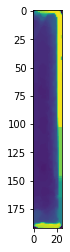

In [ ]:
# Median Filter : remove the speckle noise of the image 
no_Lenoise=[]
for i in range(len(erey)):
  blure=median_filter(erey[i], 5)
  no_Lenoise.append(blure)
no_Lenoise
plt.imshow(no_Lenoise[0])
print(len(no_Lenoise))

In [ ]:
lbpe_hist=[]
for i in range(len(no_Lenoise)):
  lbpe_hist.append(lbp_features(no_Lenoise[i], 2, 8))
lbpe_hist

[array([0.00083333, 0.01541667, 0.0075    , 0.04854167, 0.19395833,
        0.413125  , 0.0425    , 0.04125   , 0.18895833, 0.04791667]),
 array([0.00294118, 0.0199095 , 0.02149321, 0.10972851, 0.26334842,
        0.32782805, 0.04977376, 0.04638009, 0.12171946, 0.03687783]),
 array([0.00188768, 0.02571968, 0.01061822, 0.08140632, 0.19443134,
        0.31359132, 0.04318075, 0.06229353, 0.21967909, 0.04719207]),
 array([0.00150408, 0.02342071, 0.0124624 , 0.07391491, 0.14782982,
        0.31220456, 0.03910615, 0.05565105, 0.25204125, 0.08186506]),
 array([0.0005787 , 0.01099537, 0.00462963, 0.03780864, 0.19598765,
        0.44174383, 0.03954475, 0.04108796, 0.16685957, 0.06076389]),
 array([2.35960359e-04, 7.55073148e-03, 7.07881076e-03, 3.49221331e-02,
        2.00330344e-01, 4.17177914e-01, 3.68098159e-02, 3.23265691e-02,
        1.81689476e-01, 8.18782444e-02]),
 array([0.00094384, 0.01722511, 0.00707881, 0.05427088, 0.18876829,
        0.40396413, 0.04978764, 0.05521472, 0.16352053, 

10


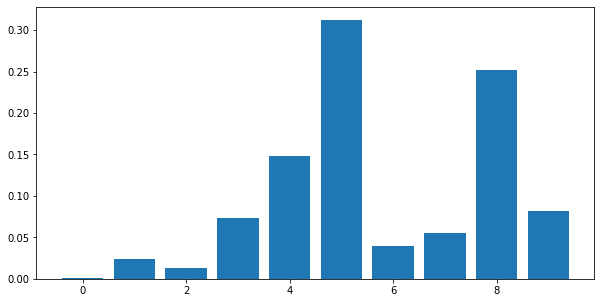

In [ ]:
vals=range(len(lbpe_hist[3]))
plt.figure(figsize=(10,5))
plt.bar(vals, lbpe_hist[3])
print(len(lbpe_hist[3]))

In [ ]:
data_emp=pd.DataFrame(lbpe_hist)
data_emp

,0,1,2,3,4,5,6,7,8,9
0,0.000833,0.015417,0.007500,0.048542,0.193958,0.413125,0.042500,0.041250,0.188958,0.047917
1,0.002941,0.019910,0.021493,0.109729,0.263348,0.327828,0.049774,0.046380,0.121719,0.036878
2,0.001888,0.025720,0.010618,0.081406,0.194431,0.313591,0.043181,0.062294,0.219679,0.047192
3,0.001504,0.023421,0.012462,0.073915,0.147830,0.312205,0.039106,0.055651,0.252041,0.081865
4,0.000579,0.010995,0.004630,0.037809,0.195988,0.441744,0.039545,0.041088,0.166860,0.060764
5,0.000236,0.007551,0.007079,0.034922,0.200330,0.417178,0.036810,0.032327,0.181689,0.081878
6,0.000944,0.017225,0.007079,0.054271,0.188768,0.403964,0.049788,0.055215,0.163521,0.059226
7,0.001202,0.010337,0.015865,0.051923,0.172115,0.451202,0.041587,0.058173,0.174519,0.023077
8,0.001862,0.013594,0.010615,0.066108,0.274302,0.403724,0.027747,0.032030,0.124767,0.045251
9,0.000625,0.016667,0.005208,0.048958,0.177083,0.352292,0.033958,0.038958,0.186667,0.139583


In [ ]:
dat2=(data_emp).T
dat2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,0.000833,0.002941,0.001888,0.001504,0.000579,0.000236,0.000944,0.001202,0.001862,0.000625,0.000752,0.002513,0.001680,0.000995,0.001984,0.002355,0.001764,0.001479,0.002420,0.000957,0.000524,0.001652,0.002924,0.002854,0.000483,0.001725,0.001736,0.001412,0.001095,0.001374,0.003401,0.002117,0.002260,0.003137,0.003333,0.001636,0.002389,0.000520,0.000768,0.002340,0.001246,0.001965,0.001051,0.000712,0.002801,0.001292,0.002887,0.002976,0.002033,0.001917,0.002548,0.001058,0.000911,0.003349,0.002530
1,0.015417,0.019910,0.025720,0.023421,0.010995,0.007551,0.017225,0.010337,0.013594,0.016667,0.014288,0.012334,0.010502,0.015920,0.015306,0.019054,0.013668,0.020118,0.021476,0.013397,0.007858,0.018442,0.013743,0.013951,0.010145,0.016908,0.022917,0.010353,0.021073,0.015385,0.013082,0.015426,0.013310,0.021961,0.018148,0.017298,0.023411,0.015873,0.019969,0.029412,0.027406,0.017686,0.019968,0.014245,0.024899,0.021634,0.016601,0.020833,0.016938,0.021906,0.021656,0.014603,0.018438,0.015789,0.011732
2,0.007500,0.021493,0.010618,0.012462,0.004630,0.007079,0.007079,0.015865,0.010615,0.005208,0.013160,0.010964,0.010292,0.014527,0.013322,0.010062,0.017857,0.009172,0.015729,0.010845,0.008381,0.010460,0.013743,0.015536,0.009903,0.016218,0.012153,0.015059,0.014778,0.013736,0.013344,0.013309,0.012557,0.016078,0.011852,0.010753,0.013617,0.013531,0.011265,0.016377,0.014949,0.005895,0.009459,0.013533,0.012761,0.011301,0.017683,0.019643,0.008808,0.018894,0.014437,0.010794,0.016845,0.008373,0.009432
3,0.048542,0.109729,0.081406,0.073915,0.037809,0.034922,0.054271,0.051923,0.066108,0.048958,0.073886,0.063042,0.074774,0.079403,0.054422,0.070435,0.082451,0.076923,0.064731,0.082935,0.074908,0.055051,0.079532,0.084654,0.064734,0.057281,0.082986,0.074588,0.085660,0.057692,0.062533,0.065336,0.062531,0.068235,0.054815,0.063815,0.071667,0.063232,0.064772,0.095922,0.082217,0.057480,0.078560,0.066595,0.084345,0.049403,0.076146,0.103571,0.088076,0.066539,0.086200,0.069630,0.084908,0.061962,0.072004
4,0.193958,0.263348,0.194431,0.147830,0.195988,0.200330,0.188768,0.172115,0.274302,0.177083,0.224478,0.123801,0.288805,0.243383,0.139456,0.251124,0.245811,0.206509,0.126739,0.297289,0.375327,0.119461,0.223977,0.246037,0.218116,0.146308,0.228472,0.249176,0.199507,0.165659,0.141287,0.135814,0.201657,0.142745,0.163704,0.173212,0.216197,0.230549,0.194060,0.156417,0.147618,0.197740,0.209143,0.106125,0.274199,0.101066,0.207506,0.232143,0.251694,0.189211,0.214862,0.199153,0.210107,0.134450,0.213711
5,0.413125,0.327828,0.313591,0.312205,0.441744,0.417178,0.403964,0.451202,0.403724,0.352292,0.312465,0.328004,0.444444,0.378308,0.437075,0.361807,0.340608,0.305621,0.320024,0.451356,0.402829,0.327278,0.400585,0.361446,0.419082,0.332298,0.450694,0.324000,0.336617,0.355220,0.309785,0.371748,0.393270,0.338431,0.358889,0.354371,0.363593,0.433515,0.389401,0.299131,0.334787,0.333579,0.380977,0.339387,0.309679,0.291572,0.390112,0.327976,0.453591,0.371303,0.446285,0.331852,0.312543,0.316029,0.366690
6,0.042500,0.049774,0.043181,0.039106,0.039545,0.036810,0.049788,0.041587,0.027747,0.033958,0.046625,0.036775,0.034447,0.048358,0.035998,0.037893,0.061287,0.056213,0.043255,0.034450,0.030120,0.039361,0.042690,0.038681,0.029710,0.035197,0.039931,0.047294,0.049808,0.039560,0.050497,0.034785,0.045203,0.044706,0.035556,0.039271,0.036789,0.045277,0.036354,0.045455,0.041420,0.036846,0.043353,0.037393,0.034547,0.031321,0.052689,0.052083,0.040312,0.066813,0.039915,0.045079,0.050763,0.050239,0.039568
7,0.041250,0.046380,0.062294,0.055651,0.041088,0.032327,0.055215,0.058173,0.032030,0.038958,0.047377,0.053677,0.035497,0.040000,0.047052,0.047527,0.058201,0.045266,0.059891,0.028070,0.016763,0.052023,0.042105,0.043437,0.034541,0.041408,0.039931,0.064000,0.045977,0.046703,0.083203,0.041137,0.042190,0.041569,0.050000,0.046517,0.038939,0.055686,0.037122,0.051805,0.0

In [ ]:
dat2.rename(columns={0:'e', 1:'e', 2:'e', 3:'e', 4:'e', 5:'e', 6:'e', 7:'e', 8:'e', 9:'e', 10:'e', 11:'e', 12:'e', 13:'e', 14:'e', 15:'e',16:'e', 17:'e', 18:'e', 19:'e', 20:'e', 21:'e', 22:'e', 23:'e', 24:'e', 25:'e', 26:'e', 27:'e', 28:'e', 29:'e', 30:'e', 31:'e', 32:'e', 33:'e', 34:'e', 35:'e', 36:'e', 37:'e', 38:'e', 39:'e', 40:'e', 41:'e', 42:'e', 43:'e', 44:'e', 45:'e', 46:'e', 47:'e', 48:'e', 49:'e', 50:'e', 51:'e', 52:'e', 53:'e', 54:'e', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
dat2

,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e
0,0.000833,0.002941,0.001888,0.001504,0.000579,0.000236,0.000944,0.001202,0.001862,0.000625,0.000752,0.002513,0.001680,0.000995,0.001984,0.002355,0.001764,0.001479,0.002420,0.000957,0.000524,0.001652,0.002924,0.002854,0.000483,0.001725,0.001736,0.001412,0.001095,0.001374,0.003401,0.002117,0.002260,0.003137,0.003333,0.001636,0.002389,0.000520,0.000768,0.002340,0.001246,0.001965,0.001051,0.000712,0.002801,0.001292,0.002887,0.002976,0.002033,0.001917,0.002548,0.001058,0.000911,0.003349,0.002530
1,0.015417,0.019910,0.025720,0.023421,0.010995,0.007551,0.017225,0.010337,0.013594,0.016667,0.014288,0.012334,0.010502,0.015920,0.015306,0.019054,0.013668,0.020118,0.021476,0.013397,0.007858,0.018442,0.013743,0.013951,0.010145,0.016908,0.022917,0.010353,0.021073,0.015385,0.013082,0.015426,0.013310,0.021961,0.018148,0.017298,0.023411,0.015873,0.019969,0.029412,0.027406,0.017686,0.019968,0.014245,0.024899,0.021634,0.016601,0.020833,0.016938,0.021906,0.021656,0.014603,0.018438,0.015789,0.011732
2,0.007500,0.021493,0.010618,0.012462,0.004630,0.007079,0.007079,0.015865,0.010615,0.005208,0.013160,0.010964,0.010292,0.014527,0.013322,0.010062,0.017857,0.009172,0.015729,0.010845,0.008381,0.010460,0.013743,0.015536,0.009903,0.016218,0.012153,0.015059,0.014778,0.013736,0.013344,0.013309,0.012557,0.016078,0.011852,0.010753,0.013617,0.013531,0.011265,0.016377,0.014949,0.005895,0.009459,0.013533,0.012761,0.011301,0.017683,0.019643,0.008808,0.018894,0.014437,0.010794,0.016845,0.008373,0.009432
3,0.048542,0.109729,0.081406,0.073915,0.037809,0.034922,0.054271,0.051923,0.066108,0.048958,0.073886,0.063042,0.074774,0.079403,0.054422,0.070435,0.082451,0.076923,0.064731,0.082935,0.074908,0.055051,0.079532,0.084654,0.064734,0.057281,0.082986,0.074588,0.085660,0.057692,0.062533,0.065336,0.062531,0.068235,0.054815,0.063815,0.071667,0.063232,0.064772,0.095922,0.082217,0.057480,0.078560,0.066595,0.084345,0.049403,0.076146,0.103571,0.088076,0.066539,0.086200,0.069630,0.084908,0.061962,0.072004
4,0.193958,0.263348,0.194431,0.147830,0.195988,0.200330,0.188768,0.172115,0.274302,0.177083,0.224478,0.123801,0.288805,0.243383,0.139456,0.251124,0.245811,0.206509,0.126739,0.297289,0.375327,0.119461,0.223977,0.246037,0.218116,0.146308,0.228472,0.249176,0.199507,0.165659,0.141287,0.135814,0.201657,0.142745,0.163704,0.173212,0.216197,0.230549,0.194060,0.156417,0.147618,0.197740,0.209143,0.106125,0.274199,0.101066,0.207506,0.232143,0.251694,0.189211,0.214862,0.199153,0.210107,0.134450,0.213711
5,0.413125,0.327828,0.313591,0.312205,0.441744,0.417178,0.403964,0.451202,0.403724,0.352292,0.312465,0.328004,0.444444,0.378308,0.437075,0.361807,0.340608,0.305621,0.320024,0.451356,0.402829,0.327278,0.400585,0.361446,0.419082,0.332298,0.450694,0.324000,0.336617,0.355220,0.309785,0.371748,0.393270,0.338431,0.358889,0.354371,0.363593,0.433515,0.389401,0.299131,0.334787,0.333579,0.380977,0.339387,0.309679,0.291572,0.390112,0.327976,0.453591,0.371303,0.446285,0.331852,0.312543,0.316029,0.366690
6,0.042500,0.049774,0.043181,0.039106,0.039545,0.036810,0.049788,0.041587,0.027747,0.033958,0.046625,0.036775,0.034447,0.048358,0.035998,0.037893,0.061287,0.056213,0.043255,0.034450,0.030120,0.039361,0.042690,0.038681,0.029710,0.035197,0.039931,0.047294,0.049808,0.039560,0.050497,0.034785,0.045203,0.044706,0.035556,0.039271,0.036789,0.045277,0.036354,0.045455,0.041420,0.036846,0.043353,0.037393,0.034547,0.031321,0.052689,0.052083,0.040312,0.066813,0.039915,0.045079,0.050763,0.050239,0.039568
7,0.041250,0.046380,0.062294,0.055651,0.041088,0.032327,0.055215,0.058173,0.032030,0.038958,0.047377,0.053677,0.035497,0.040000,0.047052,0.047527,0.058201,0.045266,0.059891,0.028070,0.016763,0.052023,0.042105,0.043437,0.034541,0.041408,0.039931,0.064000,0.045977,0.046703,0.083203,0.041137,0.042190,0.041569,0.050000,0.046517,0.038939,0.055686,0.037122,0.051805,0.044223,0.027757,0.036784,0.045940,0.027077,0.0

In [ ]:
de=dat2.T
de
de.rename(columns={0:'f1', 1:'f2', 2:'f3', 3:'f4', 4:'f5', 5:'f6', 6:'f7', 7:'f8', 8:'f9', 9:'f10'}, inplace=True)

In [ ]:
de

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
e,0.000833,0.015417,0.007500,0.048542,0.193958,0.413125,0.042500,0.041250,0.188958,0.047917
e,0.002941,0.019910,0.021493,0.109729,0.263348,0.327828,0.049774,0.046380,0.121719,0.036878
e,0.001888,0.025720,0.010618,0.081406,0.194431,0.313591,0.043181,0.062294,0.219679,0.047192
e,0.001504,0.023421,0.012462,0.073915,0.147830,0.312205,0.039106,0.055651,0.252041,0.081865
e,0.000579,0.010995,0.004630,0.037809,0.195988,0.441744,0.039545,0.041088,0.166860,0.060764
e,0.000236,0.007551,0.007079,0.034922,0.200330,0.417178,0.036810,0.032327,0.181689,0.081878
e,0.000944,0.017225,0.007079,0.054271,0.188768,0.403964,0.049788,0.055215,0.163521,0.059226
e,0.001202,0.010337,0.015865,0.051923,0.172115,0.451202,0.041587,0.058173,0.174519,0.023077
e,0.001862,0.013594,0.010615,0.066108,0.274302,0.403724,0.027747,0.032030,0.124767,0.045251
e,0.000625,0.016667,0.005208,0.048958,0.177083,0.352292,0.033958,0.038958,0.186667,0.139583


In [ ]:
empty=de
empty
len(empty)

55

In [ ]:
frames=[good, empty]
Together=pd.concat(frames)
Together

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
g,0.005087,0.030289,0.044393,0.104740,0.153295,0.262197,0.087861,0.072370,0.150751,0.089017
g,0.005885,0.023749,0.032997,0.087642,0.155738,0.275536,0.102354,0.071459,0.100673,0.143968
g,0.008108,0.043035,0.047609,0.132640,0.211227,0.231393,0.087110,0.065073,0.093555,0.080249
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
g,0.003972,0.030518,0.032191,0.099080,0.174749,0.292433,0.076505,0.062918,0.149666,0.077968
...,...,...,...,...,...,...,...,...,...,...
e,0.002548,0.021656,0.014437,0.086200,0.214862,0.446285,0.039915,0.046709,0.054352,0.073036
e,0.001058,0.014603,0.010794,0.069630,0.199153,0.331852,0.045079,0.044868,0.171217,0.111746
e,0.000911,0.018438,0.016845,0.084908,0.210107,0.312543,0.050763,0.050307,0.156385,0.098794
e,0.003349,0.015789,0.008373,0.061962,0.134450,0.316029,0.050239,0.074163,0.275120,0.060526


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Spectral clustering by using Building functions

In [ ]:
clustering=SpectralClustering(n_clusters=2, eigen_solver='arpack', n_components=2, random_state=42, n_init=10, gamma=0.5, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None).fit(Together)

In [ ]:
labels=clustering.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

(array([52.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 54.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

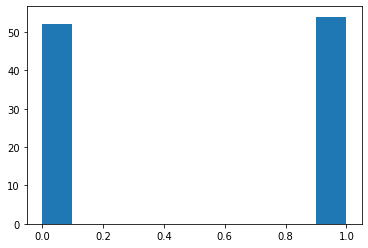

In [ ]:
Table=[]
True_labels=[]
for i in range(52):
  True_labels.append(0)
for i in range(55):
  True_labels.append(1) 
for i in range(107):
  if True_labels[i]==labels[i]:
    Table.append(labels[i])  
Table
plt.hist(Table)

In [ ]:
count1=0
count2=0
count3=0
count4=0
True_labels=[]
for i in range(52):
  True_labels.append(0)
for i in range(55):
  True_labels.append(1) 
for i in range(52):
  if True_labels[i]==labels[i]:count1+=1
  else: 
    count2+=1
for i in range(52, 107):
  if True_labels[i]==labels[i]:count3+=1
  else:
     count4+=1
print(count1)  
print(count2)
print(count3)   
print(count4)   

52
0
54
1


In [ ]:
Accuracy=(count1+count3)*100/107
Accuracy

99.06542056074767

In [ ]:
import numba as nb
import numpy as np
@nb.njit(fastmath=True,error_model="numpy",parallel=True)
def gaussian_kernel_2(X, X1, sigma):
    res=np.empty((X.shape[0],X1.shape[0]))
    for i in nb.prange(X.shape[0]):
        for j in range(X1.shape[0]):
            acc=0.
            for k in range(X.shape[1]):
                acc+=(X[i,k]-X1[j,k])**2/(2*sigma**2)
            res[i,j]=np.exp(-1*acc)
    return res

In [ ]:
Matrix=Together.to_numpy()
Matrix

array([[0.00508671, 0.03028902, 0.04439306, ..., 0.07236994, 0.15075145,
        0.08901734],
       [0.00588483, 0.02374947, 0.03299706, ..., 0.0714586 , 0.10067255,
        0.14396805],
       [0.00810811, 0.04303534, 0.04760915, ..., 0.06507277, 0.09355509,
        0.08024948],
       ...,
       [0.00091054, 0.01843842, 0.01684498, ..., 0.05030731, 0.15638516,
        0.09879354],
       [0.00334928, 0.01578947, 0.00837321, ..., 0.07416268, 0.27511962,
        0.06052632],
       [0.00253048, 0.01173223, 0.00943179, ..., 0.04393835, 0.19116632,
        0.04922935]])

In [ ]:
# Similarity Matrix
sigma=1
SM=gaussian_kernel_2(Matrix, Matrix, sigma)
SM

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


array([[1.        , 0.99681116, 0.99567566, ..., 0.99547884, 0.98792771,
        0.98828377],
       [0.99681116, 1.        , 0.99400467, ..., 0.9935705 , 0.97846233,
        0.98290312],
       [0.99567566, 0.99400467, 1.        , ..., 0.99188369, 0.97279949,
        0.98134919],
       ...,
       [0.99547884, 0.9935705 , 0.99188369, ..., 1.        , 0.98882341,
        0.99648311],
       [0.98792771, 0.97846233, 0.97279949, ..., 0.98882341, 1.        ,
        0.99145121],
       [0.98828377, 0.98290312, 0.98134919, ..., 0.99648311, 0.99145121,
        1.        ]])

In [ ]:
from sklearn.metrics import pairwise_distances
A=np.exp(-1./(2*1)*pairwise_distances(Matrix, metric='sqeuclidean'))
A

array([[1.        , 0.99681116, 0.99567566, ..., 0.99547884, 0.98792771,
        0.98828377],
       [0.99681116, 1.        , 0.99400467, ..., 0.9935705 , 0.97846233,
        0.98290312],
       [0.99567566, 0.99400467, 1.        , ..., 0.99188369, 0.97279949,
        0.98134919],
       ...,
       [0.99547884, 0.9935705 , 0.99188369, ..., 1.        , 0.98882341,
        0.99648311],
       [0.98792771, 0.97846233, 0.97279949, ..., 0.98882341, 1.        ,
        0.99145121],
       [0.98828377, 0.98290312, 0.98134919, ..., 0.99648311, 0.99145121,
        1.        ]])

In [ ]:
#D = np.diag(np.sum(A,axis=1))
#L=np.power(D, -0.5)* A* np.power(D, -0.5)
#L

In [ ]:
D = np.diag(np.sum(SM,axis=1))
D_half_inv = np.diag(1.0 / np.sqrt(np.sum(SM, axis=1)))
M = np.dot(D_half_inv, np.dot((D - SM), D_half_inv))

In [ ]:
D.shape
D

array([[106.04522913,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 105.80210768,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 105.60805726, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 106.25231258,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        105.1899075 ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 105.89896362]])

In [ ]:
D_half_inv

array([[0.09710787, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09721938, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.09730866, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.09701319, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09750187,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09717491]])

In [ ]:
M

array([[ 0.99057006, -0.00941066, -0.00940857, ..., -0.00937815,
        -0.0093539 , -0.00932589],
       [-0.00941066,  0.99054839, -0.00940357, ..., -0.00937092,
        -0.00927491, -0.00928577],
       [-0.00940857, -0.00940357,  0.99053103, ..., -0.0093636 ,
        -0.0092297 , -0.0092796 ],
       ...,
       [-0.00937815, -0.00937092, -0.0093636 , ...,  0.99058844,
        -0.00935325, -0.00939409],
       [-0.0093539 , -0.00927491, -0.0092297 , ..., -0.00935325,
         0.99049338, -0.00939374],
       [-0.00932589, -0.00928577, -0.0092796 , ..., -0.00939409,
        -0.00939374,  0.99055704]])

In [ ]:
(e_vals, e_vecs) = np.linalg.eigh(M) 

In [ ]:
(e_vals, e_vecs)

(array([8.78898581e-16, 9.93926590e-01, 9.95348989e-01, 9.99035021e-01,
        9.99355659e-01, 9.99887580e-01, 9.99931338e-01, 9.99956560e-01,
        9.99965185e-01, 9.99982470e-01, 9.99987852e-01, 9.99993217e-01,
        9.99996099e-01, 9.99997491e-01, 9.99998420e-01, 9.99998590e-01,
        9.99998895e-01, 9.99998999e-01, 9.99999504e-01, 9.99999530e-01,
        9.99999621e-01, 9.99999719e-01, 9.99999809e-01, 9.99999881e-01,
        9.99999888e-01, 9.99999922e-01, 9.99999929e-01, 9.99999931e-01,
        9.99999949e-01, 9.99999953e-01, 9.99999960e-01, 9.99999969e-01,
        9.99999979e-01, 9.99999982e-01, 9.99999986e-01, 9.99999987e-01,
        9.99999989e-01, 9.99999991e-01, 9.99999993e-01, 9.99999993e-01,
        9.99999994e-01, 9.99999995e-01, 9.99999996e-01, 9.99999996e-01,
        9.99999997e-01, 9.99999997e-01, 9.99999998e-01, 9.99999998e-01,
        9.99999998e-01, 9.99999998e-01, 9.99999999e-01, 9.99999999e-01,
        9.99999999e-01, 9.99999999e-01, 9.99999999e-01, 9.999999

In [ ]:
# Let U be the matrix containing the differents vectors as columns

In [ ]:
U=e_vecs
len(U)

107

In [ ]:
# Form the matrix T from U by normalizing the rows to norm 1
import numba as nb
import numpy as np
id=U.shape
idx=id[0]
#@nb.njit(fastmath=True,error_model="numpy",parallel=True)
#def gaussian_kernel_2(X, X1, sigma):
T=np.empty((idx,idx))
for i in nb.prange(idx):
  for j in range(idx):
      bcc=0.
      for k in range(idx):
        bcc+=(U[i,k])**2
        T[i,j]=U[i,j]/np.sqrt(bcc)
print(T)

[[-9.68463877e-02  7.97527922e-02 -4.60746570e-02 ... -2.59650389e-01
   0.00000000e+00  0.00000000e+00]
 [-9.67353080e-02  9.32326893e-02  6.70969188e-03 ... -1.47898168e-02
   3.85809858e-09  4.71029141e-06]
 [-9.66465567e-02  1.27206792e-01  5.87363827e-02 ... -1.12934590e-01
  -7.84933825e-08 -2.12870354e-05]
 ...
 [-9.69409016e-02 -1.35469529e-02  3.55779939e-04 ...  3.83733169e-02
  -5.56906483e-05  6.77147775e-05]
 [-9.64550334e-02 -5.93020602e-02 -1.90780223e-01 ... -1.67527243e-02
  -3.49963567e-07 -9.81649728e-06]
 [-9.67795757e-02 -1.03381875e-01 -1.50735634e-02 ... -1.08002254e-02
  -2.18341074e-05  5.91523738e-06]]


In [ ]:
S=T[1]
sum=0
for i in range(len(S)):
 sum+=(S[i])**2
print(S)
print(sum)

[-9.67353080e-02  9.32326893e-02  6.70969188e-03 -1.87348106e-01
  6.81410077e-02 -8.43966545e-02 -1.48776952e-01  1.05266409e-01
 -2.64287371e-02 -1.87966127e-01  3.55923893e-02 -1.77138898e-01
 -1.34080273e-02 -3.04913549e-01 -2.18649619e-01 -6.57982802e-02
 -6.80626603e-02 -9.92129730e-03 -3.68440045e-02  6.20378398e-02
  4.24722931e-02 -2.10698559e-01 -1.22972118e-01  3.26927959e-03
 -9.85812354e-02  2.49614376e-02 -2.54660686e-01 -2.22964397e-02
 -8.65605899e-02 -6.38710770e-02  1.81361474e-01 -7.98330051e-02
  1.20888539e-01 -1.67568325e-01 -1.33439146e-01  2.75805468e-01
  1.86266255e-01 -2.64117332e-01  4.72918579e-02 -9.08268582e-04
 -5.45584024e-02  7.25656596e-02 -4.72858090e-02  7.86578774e-04
 -4.06464552e-02 -7.38265018e-02  1.74353476e-02  8.40652821e-02
 -2.00541122e-02 -1.20773159e-01  1.08607661e-01 -2.96655528e-02
 -1.61477728e-01  1.54958972e-01  1.58561965e-01  1.24894516e-01
  6.74474642e-02 -6.25579862e-03  7.14704977e-03  7.57853063e-02
  3.96386157e-02 -4.67690

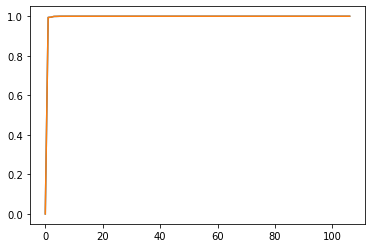

In [ ]:
fig = plt.figure()
ax1 = plt.plot(e_vals)
plt.plot(e_vals)
#ax1.title.set_text('eigenvalues')
#i = np.where(e < 10e-6)[0]
#ax2 = plt.subplot(122)
#plt.plot(v[:, i[0]])
#fig.tight_layout()
plt.show()

In [ ]:
e_vals_sorted_indices=np.argsort(e_vals)
e_vals_sorted=e_vals[e_vals_sorted_indices]
e_vals_sorted

array([8.78898581e-16, 9.93926590e-01, 9.95348989e-01, 9.99035021e-01,
       9.99355659e-01, 9.99887580e-01, 9.99931338e-01, 9.99956560e-01,
       9.99965185e-01, 9.99982470e-01, 9.99987852e-01, 9.99993217e-01,
       9.99996099e-01, 9.99997491e-01, 9.99998420e-01, 9.99998590e-01,
       9.99998895e-01, 9.99998999e-01, 9.99999504e-01, 9.99999530e-01,
       9.99999621e-01, 9.99999719e-01, 9.99999809e-01, 9.99999881e-01,
       9.99999888e-01, 9.99999922e-01, 9.99999929e-01, 9.99999931e-01,
       9.99999949e-01, 9.99999953e-01, 9.99999960e-01, 9.99999969e-01,
       9.99999979e-01, 9.99999982e-01, 9.99999986e-01, 9.99999987e-01,
       9.99999989e-01, 9.99999991e-01, 9.99999993e-01, 9.99999993e-01,
       9.99999994e-01, 9.99999995e-01, 9.99999996e-01, 9.99999996e-01,
       9.99999997e-01, 9.99999997e-01, 9.99999998e-01, 9.99999998e-01,
       9.99999998e-01, 9.99999998e-01, 9.99999999e-01, 9.99999999e-01,
       9.99999999e-01, 9.99999999e-01, 9.99999999e-01, 9.99999999e-01,
      

[Text(0, 0.5, '$\\lambda$'),
 Text(0.5, 0, 'index'),
 Text(0.5, 1.0, 'Sorted Eigenvalues Graph Laplacian')]

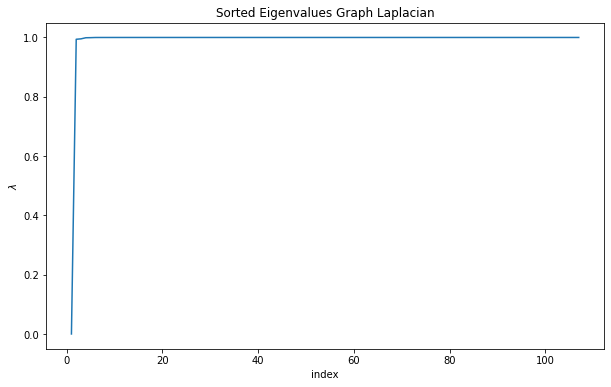

In [ ]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,6)) 
sns.lineplot(x=range(1, e_vals_sorted_indices.size+1), y=e_vals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$')

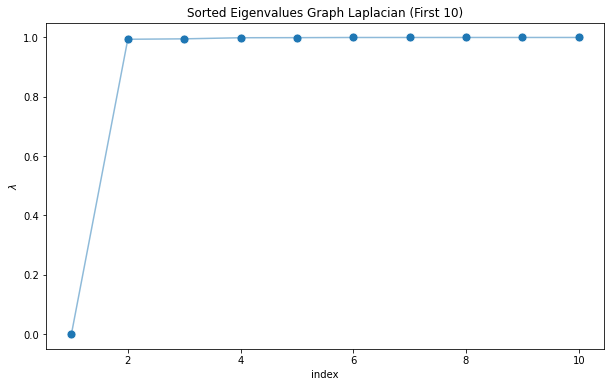

In [ ]:
index_lim=10
fig, ax=plt.subplots(figsize=(10,6)) 
sns.scatterplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], alpha=0.5, ax=ax)
#ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [ ]:
smallest_e_vals_index=np.argwhere((8.78898581e-16<e_vals)&(e_vals<9.95348989e-01))
e_vals[smallest_e_vals_index]
#np.where(e_vals==np.partition)(e_vals,1)[1]) # the second smallest eigenvalue 

array([[0.99392659]])

In [ ]:
proj_df=pd.DataFrame(e_vecs[:, smallest_e_vals_index.squeeze()])
proj_df.columns=['v_'+str(c+1) for c in proj_df.columns]
proj_df.head()

,v_1
0,0.079753
1,0.093233
2,0.127207
3,0.033234
4,0.033234


In [ ]:
from sklearn.cluster import KMeans
inertias=[]
k_candidates=range(1,6)
for k in k_candidates:
  k_means=KMeans(random_state=42, n_clusters=k)
  k_means.fit(proj_df)
  inertias.append(k_means.inertia_)

[Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k'), Text(0.5, 1.0, 'Inertia K-Means')]

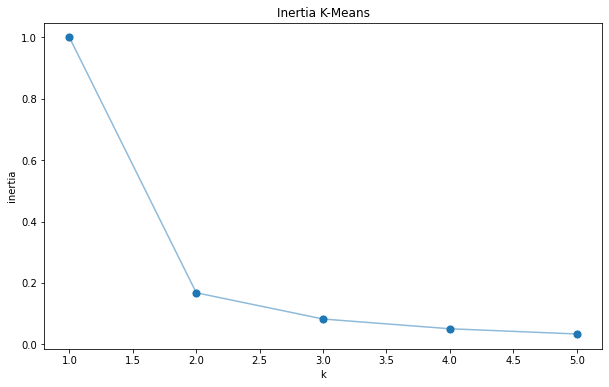

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x=k_candidates, y=inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y=inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')

In [ ]:
def run_k_means(do, n_clusters):
  k_means=KMeans(random_state=25, n_clusters=n_clusters)
  k_means.fit(do)
  cluster=k_means.predict(do)
  return cluster

cluster=run_k_means(proj_df, n_clusters=2)  
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
cout1=0
cout2=0
cout3=0
cout4=0
True_labels=[]
for i in range(52):
  True_labels.append(0)
for i in range(55):
  True_labels.append(1) 
for i in range(52):
  if True_labels[i]==cluster[i]:cout1+=1
  else: 
    cout2+=1
for i in range(52, 107):
  if True_labels[i]==cluster[i]:cout3+=1
  else:
     cout4+=1
print(cout1)  
print(cout2)
print(cout3)   
print(cout4)
print('Number of Good images well classified on 52 is', count1)   
print('Number of Empty images well classified on 53 is', count3)   

52
0
54
1
Number of Good images well classified on 52 is 52
Number of Empty images well classified on 53 is 54


In [ ]:
Accuracy=(count1+count3)*100/107
Accuracy_for_Good=(52/52)*100
Accuracy_for_Empty=(54/55)*100
print('Total Accuracy', Accuracy)
print('Accuracy for Good images', Accuracy_for_Good)
print('Accuracy for Empty images', Accuracy_for_Empty)

Total Accuracy 99.06542056074767
Accuracy for Good images 100.0
Accuracy for Empty images 98.18181818181819


Text(0.3, 0.92, 'smallest Eigenvectors Cluster')

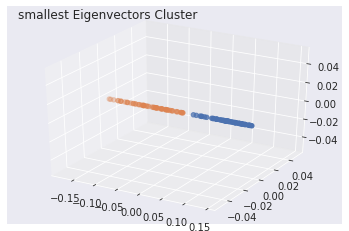

In [ ]:
sns.set_style('darkgrid',)
sns.set_palette(palette='deep')
sns_c=sns.color_palette(palette='deep')
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs=proj_df['v_1'], ys=0, zs=0, c=[{0: sns_c[0], 1: sns_c[1], 2: sns_c[2]}.get(c) for c in cluster]
)
ax.set_title('smallest Eigenvectors Cluster', x=0.3)